In [97]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

Testing a 10-armed bandit with 3 types of epsilon: 0.01, 0.1, 0.5. Each test is 1000 steps long and we run each test 2000 times to get the average.

In [98]:
rewards = np.array([[0] * 1000] * 3)
epsilons = [0.01,0.1,0.5]
for e in range(3):
    k = 5
    epsilon = epsilons[e]
    for temp in range(2000):
        means = np.random.normal(0,1,k)
        estimated_means = np.zeros((k))
        num_chosen = np.zeros((k))
        temp_reward = np.array([0] * 1000)
        for i in range(1000):
            if random.random() < epsilon:
                choice = random.randint(0,k-1)
            else:
                choice = np.argmax(estimated_means)
            num_chosen[choice] += 1
            reward = np.random.normal(means[choice], 1, 1)
            temp_reward[i] = reward
            estimated_means[choice] = estimated_means[choice] + 1 / num_chosen[choice] * (reward - estimated_means[choice])
        rewards[e] += temp_reward
    print(f"Done with test {e+1}")


/var/folders/bn/hglmht2s7y19n14x7s3vfm2m0000gn/T/ipykernel_38207/3527912855.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  temp_reward[i] = reward
/var/folders/bn/hglmht2s7y19n14x7s3vfm2m0000gn/T/ipykernel_38207/3527912855.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  estimated_means[choice] = estimated_means[choice] + 1 / num_chosen[choice] * (reward - estimated_means[choice])


Done with test 1
Done with test 2
Done with test 3


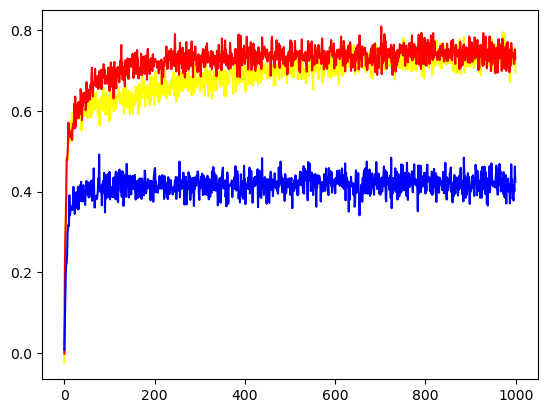

In [99]:
plt.plot(rewards[0]/2000, color = 'Yellow',label = '0.01')
plt.plot(rewards[1]/2000, color = 'Red', label = '0.1')
plt.plot(rewards[2]/2000, color = 'Blue', label = '0.5')

10-armed bandit problem with optimistic starting estimates. We don't use an epsilon.

In [108]:
rewards = np.zeros((100))
for temp in range(2000):
        means = np.random.normal(0,1,k)
        estimated_means = np.zeros((k)) + 5000
        num_chosen = np.zeros((k))
        temp_reward = np.array([0] * 100)
        for i in range(100):
            choice = np.argmax(estimated_means)
            num_chosen[choice] += 1
            reward = np.random.normal(means[choice], 1, 1)
            temp_reward[i] = reward[0]
            estimated_means[choice] = estimated_means[choice] + 1 / num_chosen[choice] * (reward - estimated_means[choice])
        rewards += temp_reward

/var/folders/bn/hglmht2s7y19n14x7s3vfm2m0000gn/T/ipykernel_38207/415014159.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  estimated_means[choice] = estimated_means[choice] + 1 / num_chosen[choice] * (reward - estimated_means[choice])


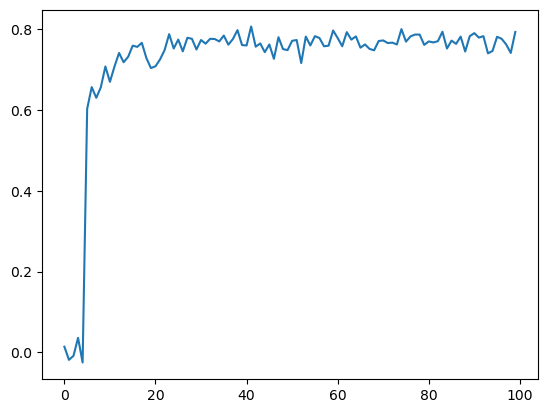

In [109]:
plt.plot(rewards/2000)

A 10-armed bandit with a changing actual mean after every step. The change for each mean in normal with mean 0 and SD of 0.1. Epsilon is 0.1. Alpha is the amount of times a given mean is chosen, so that the estimate is simply the average of the rewards gotten when choosing that mean

In [102]:
rewards1 = np.array([0] * 1000)
k = 5
epsilon = 0.1
for temp in range(2000):
    means = np.random.normal(0,1,k)
    estimated_means = np.zeros((k))
    num_chosen = np.zeros((k))
    temp_reward = np.array([0] * 1000)
    for i in range(1000):
        if random.random() < epsilon:
            choice = random.randint(0,k-1)
        else:
            choice = np.argmax(estimated_means)
        num_chosen[choice] += 1
        reward = np.random.normal(means[choice], 1, 1)
        temp_reward[i] = reward
        estimated_means[choice] = estimated_means[choice] + 1 / num_chosen[choice] * (reward - estimated_means[choice])
        means += np.random.normal(0,0.1, k)
    rewards1 += temp_reward

/var/folders/bn/hglmht2s7y19n14x7s3vfm2m0000gn/T/ipykernel_38207/4122896808.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  temp_reward[i] = reward
/var/folders/bn/hglmht2s7y19n14x7s3vfm2m0000gn/T/ipykernel_38207/4122896808.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  estimated_means[choice] = estimated_means[choice] + 1 / num_chosen[choice] * (reward - estimated_means[choice])


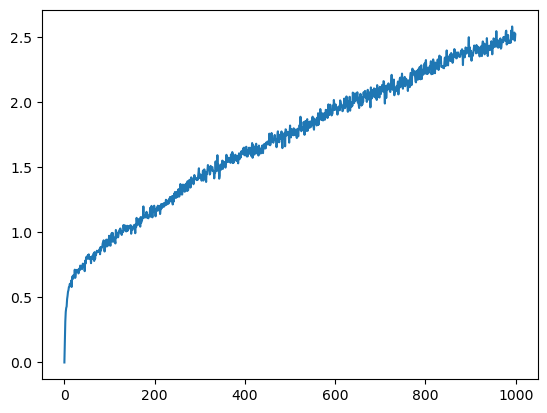

In [103]:
plt.plot(rewards1/2000)

Same code as above but alpha is a constant value, in this case set to 0.1. As one can see in the graph below, the constant value of alpha performs better than a simple average.

In [104]:
rewards = np.array([0] * 1000)
k = 5
epsilon = 0.1
for temp in range(2000):
    means = np.random.normal(0,1,k)
    estimated_means = np.zeros((k))
    num_chosen = np.zeros((k))
    temp_reward = np.array([0] * 1000)
    for i in range(1000):
        if random.random() < epsilon:
            choice = random.randint(0,k-1)
        else:
            choice = np.argmax(estimated_means)
        num_chosen[choice] += 1
        reward = np.random.normal(means[choice], 1, 1)
        temp_reward[i] = reward
        estimated_means[choice] = estimated_means[choice] + 0.1 * (reward - estimated_means[choice])
        means += np.random.normal(0,0.1, k)
    rewards += temp_reward

/var/folders/bn/hglmht2s7y19n14x7s3vfm2m0000gn/T/ipykernel_38207/108071947.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  temp_reward[i] = reward
/var/folders/bn/hglmht2s7y19n14x7s3vfm2m0000gn/T/ipykernel_38207/108071947.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  estimated_means[choice] = estimated_means[choice] + 0.1 * (reward - estimated_means[choice])


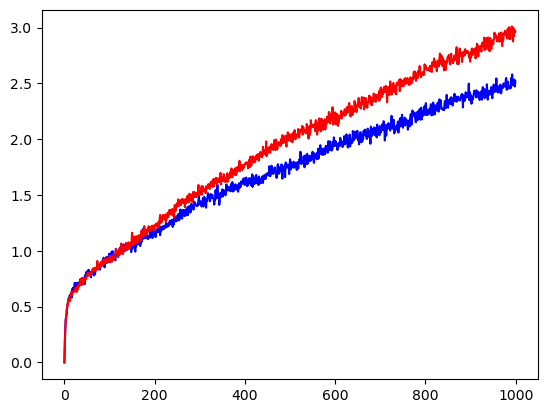

In [ ]:
plt.plot(rewards1/2000, label = 'average', color = 'Blue')
plt.plot(rewards/2000, label = 'constant alpha', color = 'Red')

Choosing which bandit to choose based on what has the highest upper bound confidence interval

In [106]:
c = 2
rewards = np.zeros((1000))
for temp in range(2000):
        means = np.random.normal(0,1,k)
        estimated_means = np.zeros((k))
        num_chosen = np.ones((k))
        temp_reward = np.array([0] * 1000)
        for i in range(1000):
            temp = [estimated_means[i] + c * np.sqrt(np.log(i+1) / num_chosen[i] + 1e-5) for i in range(k)]
            choice = 0
            for j in range(k):
                  if temp[choice] < temp[j]:
                        choice = j
            num_chosen[choice] += 1
            reward = np.random.normal(means[choice], 1, 1)
            temp_reward[i] = reward[0]
            estimated_means[choice] = estimated_means[choice] + 1 / num_chosen[choice] * (reward - estimated_means[choice])
        rewards += temp_reward

/var/folders/bn/hglmht2s7y19n14x7s3vfm2m0000gn/T/ipykernel_38207/776446134.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  estimated_means[choice] = estimated_means[choice] + 1 / num_chosen[choice] * (reward - estimated_means[choice])


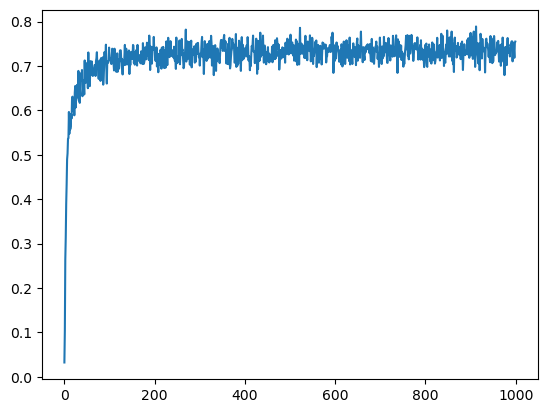

In [107]:
plt.plot(rewards/2000)